In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
import os
from sklearn.decomposition import PCA
from tools import get_acc
import time
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
current_dir = os.getcwd()

# Constants
N = 60399
embed_dim = 7
kmean_iter = 12
Add_noise = [0, 1]

In [9]:
# Load data
data = (pd.read_csv("Patient1Values.csv")).to_numpy()
data_new = np.array(data[:, 3:10], dtype=float) #feature vectors
label = np.array(data[:,10:11], dtype=int) #last col is the activity label
data_new = data_new[:N]
label = label[:N].flatten()
sorted_indices = label.argsort()
data_new = data_new[sorted_indices]
label = label[sorted_indices]

In [9]:
#mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
#data = mnist.data / 255.0
#label = mnist.target.astype(int)
#data = data[:N]
#label = label[:N]
#sorted_indices = label.argsort()
#data = data[sorted_indices]
#label = label[sorted_indices]

In [42]:
for add_noise in Add_noise:
    # Add noise if required
    if add_noise == 1:
        noise = 0.2 * np.random.randn(*data_new.shape)
        # Uncomment below for student t-distribution noise
        # noise = np.random.standard_t(4, size=data.shape) / np.sqrt(2) * 0.2
        data_new += noise

    # Perform PCA
    pca_start_time = time.time()
    pca = PCA(n_components=embed_dim)
    pca_embed = pca.fit_transform(data_new)
    time_pca = time.time() - pca_start_time

    # Calculate accuracy
    acc_pca = get_acc.get_acc(pca_embed, label, kmean_iter)

    # Save the results (adjust 'path' according to your directories)
    if add_noise:
        path = os.path.join(current_dir, 'noisy_data', 'pca')
        os.makedirs(path, exist_ok=True)
        os.chdir(path)
    else:
        path = os.path.join(current_dir, 'clean_data', 'pca')
        os.makedirs(path, exist_ok=True)
        os.chdir(path)

    pca_embed_red = pca_embed[:, :3]
    np.save('label.npy', label)
    np.save('time_pca.npy', time_pca)
    np.save('pca_embed.npy', pca_embed_red)
    np.save('acc_pca.npy', acc_pca)

In [13]:
4.42003089e+03/6074.29339234485

0.727661738494614

[4.42003089e+03 8.60647379e+02 5.58089676e+02 2.34598238e+02
 7.94584621e-01 1.25363084e-01 7.26117371e-03]
6074.29339234485


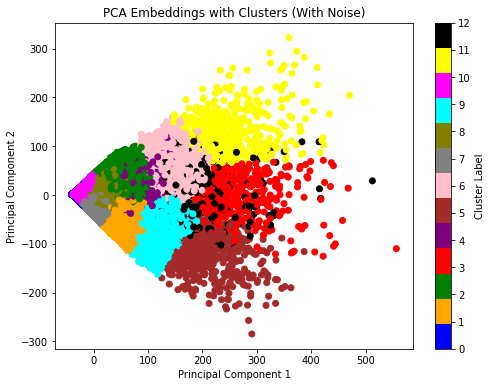

[4.42003775e+03 8.60696028e+02 5.58085622e+02 2.34642111e+02
 8.34543361e-01 1.64811509e-01 4.70726279e-02]
6074.507937278106


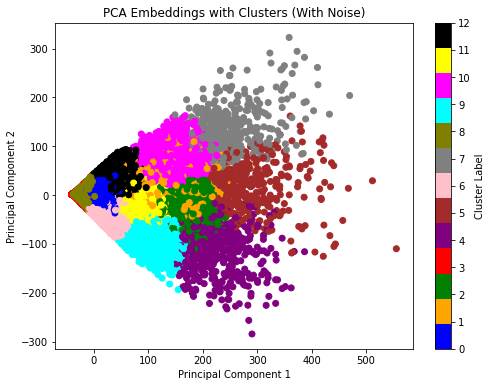

In [10]:
#PLOT CLUSTERS
N = 60399
embed_dim = 7
kmean_iter = 12
Add_noise = [0, 1]
data = (pd.read_csv("Patient1Values.csv")).to_numpy()
data_new = np.array(data[:, 3:10], dtype=float) # feature vectors
label = np.array(data[:,10:11], dtype=int) # activity label
data_new = data_new[:N]
label = label[:N].flatten()
sorted_indices = label.argsort()
data_new = data_new[sorted_indices]
label = label[sorted_indices]

for add_noise in Add_noise:
    # Add noise if required
    if add_noise == 1:
        noise = 0.2 * np.random.randn(*data_new.shape)
        data_new += noise

    # Perform PCA
    pca_start_time = time.time()
    pca_model = PCA(n_components=embed_dim)
    pca_embed = pca_model.fit_transform(data_new)
    explained_variances = pca_model.explained_variance_
    
    print(explained_variances)
    # Calculate total variance captured
    total_variance_captured = np.sum(explained_variances)
    print(total_variance_captured)
    time_pca = time.time() - pca_start_time

    # Apply Clustering Algorithm (e.g., K-means)
    kmeans = KMeans(n_clusters=13, max_iter=kmean_iter)
    clusters = kmeans.fit_predict(pca_embed)

    # Visualize Clusters
    
    cluster_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow','black']
    cmap_custom = ListedColormap(cluster_colors)
    # Step 2: Visualize Clusters
    plt.figure(figsize=(8,6))
    plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c=clusters,cmap=cmap_custom)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Embeddings with Clusters (With Noise)')
    plt.colorbar(ticks=range(13), label='Cluster Label')
    plt.show()

plt.show()

In [3]:
labelNoisy = np.load('noisy_data/pca/label.npy')
labelClean = np.load('clean_data/pca/label.npy')
NPCAEM = np.load('noisy_data/pca/pca_embed.npy')
CPCAEM = np.load('clean_data/pca/pca_embed.npy')

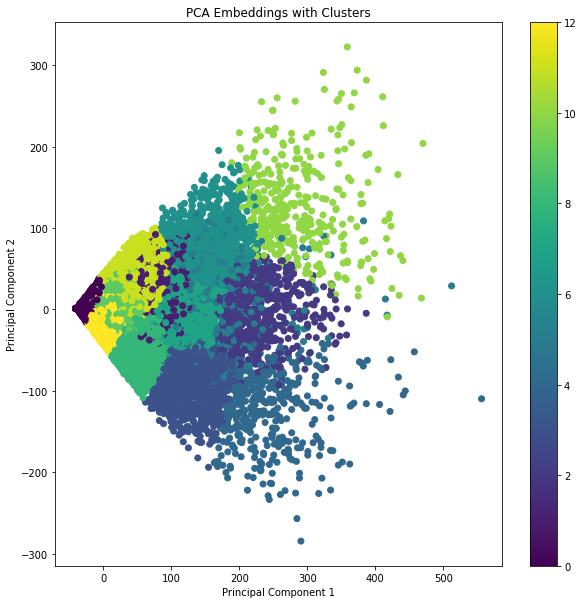

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=13)
clusters = kmeans.fit_predict(CPCAEM)

# Step 2: Visualize Clusters
plt.figure(figsize=(10,10))
plt.scatter(CPCAEM[:, 0], CPCAEM[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Embeddings with Clusters')
plt.colorbar()
plt.show()